# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [21]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [22]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
#print('-1-----------------------------------')
#print(resp.text)  # 如有需要，列印出網頁原始碼
html = BeautifulSoup(resp.text, "lxml")
#print('-2-----------------------------------')
#print(html)
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print('-3-----------------------------------')
#print(rate_table)
# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
#print('-4-----------------------------------')
#print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))

即時現金買入: 29.74, 即時現金賣出: 30.41


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [23]:
rate_tables = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print('-1---------------------')
#print(rate_tables)
for rate_table in rate_tables:
    currency = rate_table.find(name='div',attrs={'class':'visible-phone print_hide'}).text.strip()
    #print('-2---------------------')
    print(currency)
    buy = rate_table.find('td',{'data-table':'本行現金買入'}).text.strip()
    sell = rate_table.find('td',{'data-table':'本行現金賣出'}).text.strip()
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy, sell))
    print('============')

美金 (USD)
即時現金買入: 29.74, 即時現金賣出: 30.41
港幣 (HKD)
即時現金買入: 3.724, 即時現金賣出: 3.928
英鎊 (GBP)
即時現金買入: 36.71, 即時現金賣出: 38.83
澳幣 (AUD)
即時現金買入: 18.55, 即時現金賣出: 19.33
加拿大幣 (CAD)
即時現金買入: 21.28, 即時現金賣出: 22.19
新加坡幣 (SGD)
即時現金買入: 20.83, 即時現金賣出: 21.74
瑞士法郎 (CHF)
即時現金買入: 31.08, 即時現金賣出: 32.28
日圓 (JPY)
即時現金買入: 0.2753, 即時現金賣出: 0.2881
南非幣 (ZAR)
即時現金買入: -, 即時現金賣出: -
瑞典幣 (SEK)
即時現金買入: 2.72, 即時現金賣出: 3.24
紐元 (NZD)
即時現金買入: 17.96, 即時現金賣出: 18.81
泰幣 (THB)
即時現金買入: 0.8199, 即時現金賣出: 1.0099
菲國比索 (PHP)
即時現金買入: 0.5173, 即時現金賣出: 0.6503
印尼幣 (IDR)
即時現金買入: 0.00173, 即時現金賣出: 0.00243
歐元 (EUR)
即時現金買入: 32.87, 即時現金賣出: 34.21
韓元 (KRW)
即時現金買入: 0.02303, 即時現金賣出: 0.02693
越南盾 (VND)
即時現金買入: 0.00092, 即時現金賣出: 0.00142
馬來幣 (MYR)
即時現金買入: 5.93, 即時現金賣出: 7.555
人民幣 (CNY)
即時現金買入: 4.209, 即時現金賣出: 4.371


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

--2.currency:rate_table[0]--------------------
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
--3.history_link-----------------
<td class="text-center print_hide phone-small-font" data-table="歷史匯率"><a href="/xrt/history/USD" target="_blank">查詢</a></td>

美金(USD)

--4.貨幣種類-----------------
--5.該貨幣的歷史資料首頁-----------------https://rate.bot.com.tw/xrt/history/USD
https://rate.bot.com.tw/xrt/history/USD
--6.該貨幣的「歷史區間」網頁
https://rate.bot.com.tw/xrt/quote/2020-03/USD
--6.history_table :該貨幣的「歷史區間」網頁
[<tr>
<td class="text-center"><a href="/xrt/quote/2020-03-13/USD/spot">2020/03/13</a></td>
<td class="text-center tablet_hide">美金 (USD)</td>
<td class="rate-content-cash text-right print_table-cell">29.74</td>
<td class="rate-content-cash text-right print_table-cell">30.41</td>
<td class="rate-content-sight text-right print_table-cell">30.09</td>
<td class="rate-content-sight text-right print_table-cell">30.19</td>
</tr>, <tr>
<td cl

<Figure size 720x576 with 0 Axes>

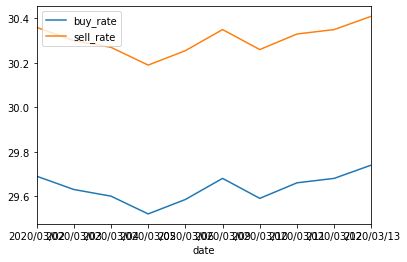

In [24]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print('--1.rate_table--------------------')
#print(rate_table) 
# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print('--2.currency:rate_table[0]--------------------')
print(currency)  # 貨幣種類
# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
print('--3.history_link-----------------')
print(history_link)
print(currency.get_text().replace(" ", ""))  # 貨幣種類
print('--4.貨幣種類-----------------')
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
print('--5.該貨幣的歷史資料首頁-----------------https://rate.bot.com.tw/xrt/history/USD')
print(history_rate_link)


#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料 https://rate.bot.com.tw/xrt/quote/2020-03/USD
quote_history_url = history_rate_link.replace("history", "quote/2020-03")
print('--6.該貨幣的「歷史區間」網頁')
print(quote_history_url)
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
print('--6.history_table :該貨幣的「歷史區間」網頁')
print(history_table)
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    print('--date_string : 未轉換日期格式-------------------')
    print(date_string)
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    print('--date : datetime轉換-------------------')
    print(date)    
    date_history.append(date)  # 日期歷史資料
    print('--date_history.append(date)-------------------')
    print(date_history)        

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    print('--history_ex_rate-------------------')
    print(history_ex_rate )      
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    print('--歷史買入匯率:float /history_buy.append------------------')
    print(history_buy ) 
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率
    print('--歷史賣入匯率:float /history_sell.append-------------------')
    print(history_sell) 
# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})
print('--將匯率資料建成dataframe形式: pd.DataFrame-------------------')
print(HistoryExchangeRate) 

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
print('--指定日期欄位為datafram的index-------------------')
print(HistoryExchangeRate) 
# 畫出歷史匯率軌跡圖
print('---畫出歷史匯率軌跡圖--------------')
plt.figure(figsize=(10, 8)) #<Figure size 720x576 with 0 Axes>
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

--curUrl-------------------
/xrt/history/USD
https://rate.bot.com.tw/xrt/history/USD
--cur-----------------------
美金 (USD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/USD


<Figure size 3600x3600 with 0 Axes>

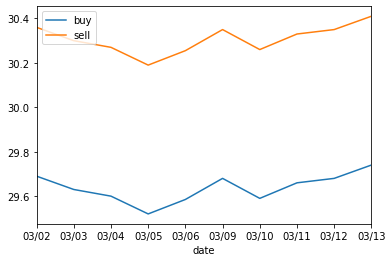

--curUrl-------------------
/xrt/history/HKD
https://rate.bot.com.tw/xrt/history/HKD
--cur-----------------------
港幣 (HKD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/HKD


<Figure size 3600x3600 with 0 Axes>

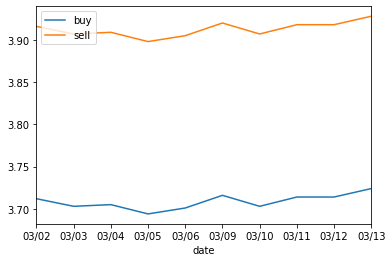

--curUrl-------------------
/xrt/history/GBP
https://rate.bot.com.tw/xrt/history/GBP
--cur-----------------------
英鎊 (GBP)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/GBP


<Figure size 3600x3600 with 0 Axes>

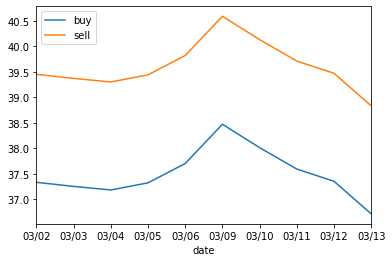

--curUrl-------------------
/xrt/history/AUD
https://rate.bot.com.tw/xrt/history/AUD
--cur-----------------------
澳幣 (AUD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/AUD


<Figure size 3600x3600 with 0 Axes>

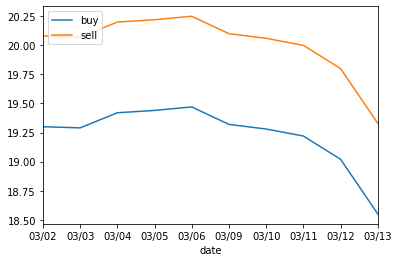

--curUrl-------------------
/xrt/history/CAD
https://rate.bot.com.tw/xrt/history/CAD
--cur-----------------------
加拿大幣 (CAD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/CAD


<Figure size 3600x3600 with 0 Axes>

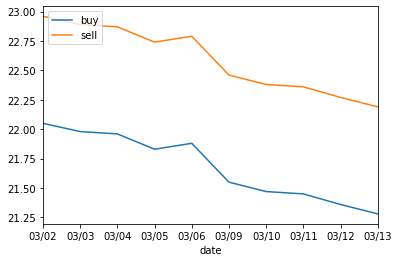

--curUrl-------------------
/xrt/history/SGD
https://rate.bot.com.tw/xrt/history/SGD
--cur-----------------------
新加坡幣 (SGD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/SGD


<Figure size 3600x3600 with 0 Axes>

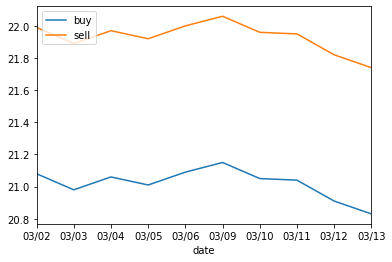

--curUrl-------------------
/xrt/history/CHF
https://rate.bot.com.tw/xrt/history/CHF
--cur-----------------------
瑞士法郎 (CHF)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/CHF


<Figure size 3600x3600 with 0 Axes>

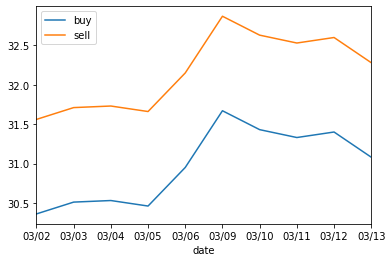

--curUrl-------------------
/xrt/history/JPY
https://rate.bot.com.tw/xrt/history/JPY
--cur-----------------------
日圓 (JPY)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/JPY


<Figure size 3600x3600 with 0 Axes>

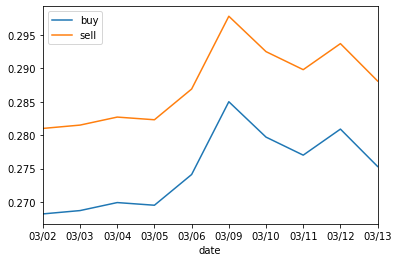

--curUrl-------------------
/xrt/history/ZAR
https://rate.bot.com.tw/xrt/history/ZAR
--cur-----------------------
南非幣 (ZAR)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/ZAR


<Figure size 3600x3600 with 0 Axes>

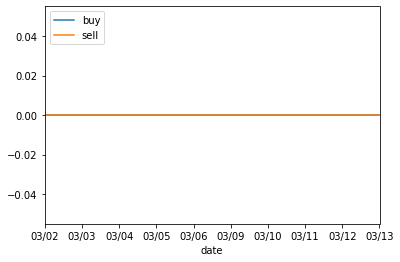

--curUrl-------------------
/xrt/history/SEK
https://rate.bot.com.tw/xrt/history/SEK
--cur-----------------------
瑞典幣 (SEK)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/SEK


<Figure size 3600x3600 with 0 Axes>

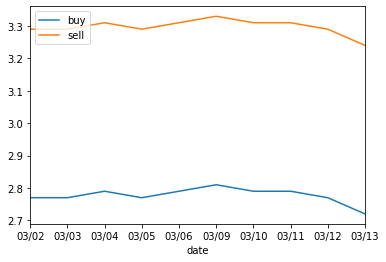

--curUrl-------------------
/xrt/history/NZD
https://rate.bot.com.tw/xrt/history/NZD
--cur-----------------------
紐元 (NZD)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/NZD


<Figure size 3600x3600 with 0 Axes>

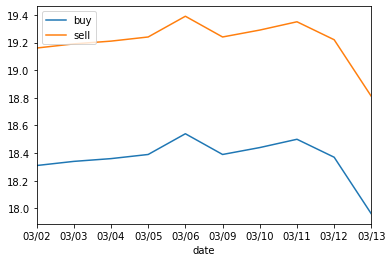

--curUrl-------------------
/xrt/history/THB
https://rate.bot.com.tw/xrt/history/THB
--cur-----------------------
泰幣 (THB)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/THB


<Figure size 3600x3600 with 0 Axes>

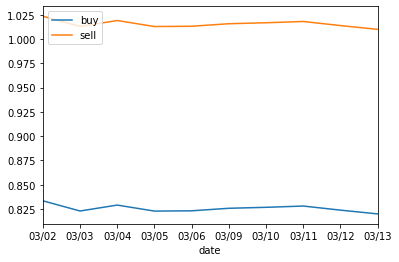

--curUrl-------------------
/xrt/history/PHP
https://rate.bot.com.tw/xrt/history/PHP
--cur-----------------------
菲國比索 (PHP)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/PHP


<Figure size 3600x3600 with 0 Axes>

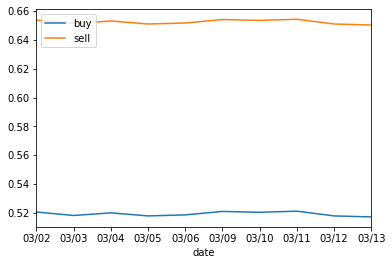

--curUrl-------------------
/xrt/history/IDR
https://rate.bot.com.tw/xrt/history/IDR
--cur-----------------------
印尼幣 (IDR)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/IDR


<Figure size 3600x3600 with 0 Axes>

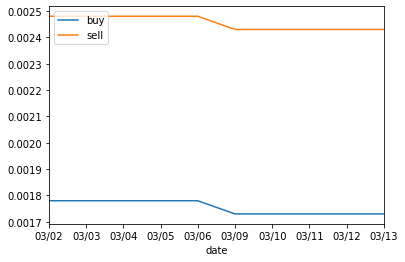

--curUrl-------------------
/xrt/history/EUR
https://rate.bot.com.tw/xrt/history/EUR
--cur-----------------------
歐元 (EUR)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/EUR


<Figure size 3600x3600 with 0 Axes>

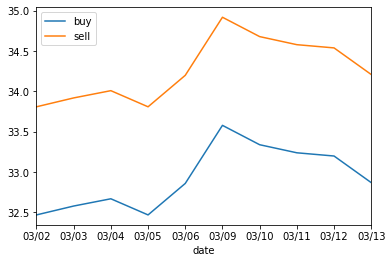

--curUrl-------------------
/xrt/history/KRW
https://rate.bot.com.tw/xrt/history/KRW
--cur-----------------------
韓元 (KRW)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/KRW


<Figure size 3600x3600 with 0 Axes>

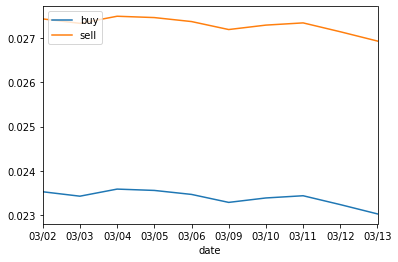

--curUrl-------------------
/xrt/history/VND
https://rate.bot.com.tw/xrt/history/VND
--cur-----------------------
越南盾 (VND)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/VND


<Figure size 3600x3600 with 0 Axes>

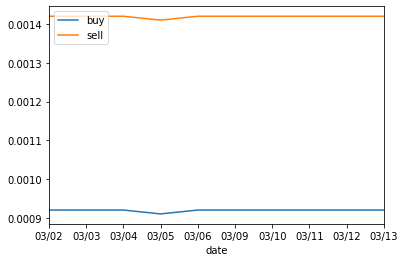

--curUrl-------------------
/xrt/history/MYR
https://rate.bot.com.tw/xrt/history/MYR
--cur-----------------------
馬來幣 (MYR)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/MYR


<Figure size 3600x3600 with 0 Axes>

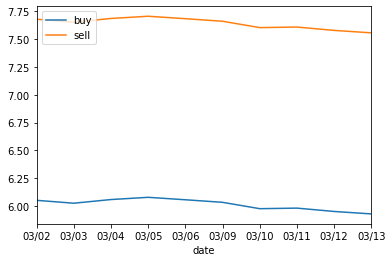

--curUrl-------------------
/xrt/history/CNY
https://rate.bot.com.tw/xrt/history/CNY
--cur-----------------------
人民幣 (CNY)

--quote_history_url-----------------
https://rate.bot.com.tw/xrt/quote/2020-03/CNY


<Figure size 3600x3600 with 0 Axes>

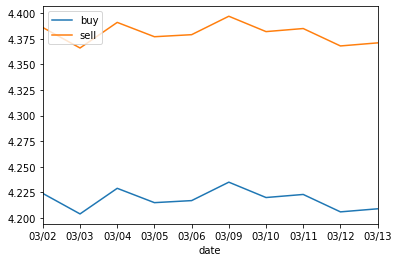

In [34]:
rate_tables = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print('--rate_tables----------------')
#print(rate_tables)
for rate_table in rate_tables:
#     print(rate_table)
    curUrl = rate_table.find('td',{'data-table':'歷史匯率'}).a['href']
    print('--curUrl-------------------')
    print(curUrl)
    curUrl = url[:url.rfind('/',)] + curUrl
    print(curUrl)
    cur = rate_table.find('div',{'class':'visible-phone print_hide'}).text.strip()
    print('--cur-----------------------')
    print(cur+'\n')
    
    quote_history_url = curUrl.replace('history','quote/2020-03')
    print('--quote_history_url-----------------')
    print(quote_history_url)
    res = requests.get(quote_history_url)
    res.encoding = 'utf-8'
    history = BeautifulSoup(res.text, "lxml")
    history_tables = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    #print('--history_tables-------------------')
    #print(history_tables)
    buyList = list()
    sellList = list()
    timeList = list()
    for history_table in history_tables:
#         print(history_table.find('a'))
        buyList.append(float(history_table.find('td',{'class':'rate-content-cash text-right print_table-cell'}).text))
        sellList.append(float(history_table.find_all('td',{'class':'rate-content-cash text-right print_table-cell'})[1].text))
        date_string = history_table.find('a').text
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%M/%d')
        timeList.append(date)
#     print(buyList)

    History = pd.DataFrame({'date': timeList,
                            'buy':buyList,
                            'sell':sellList})
    History = History.set_index('date')
    History = History.sort_index(ascending=True)#案大小排序
    plt.figure(figsize=(50, 50))
    History[['buy','sell']].plot()  
    plt.legend(loc="upper left")
    plt.show()